In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

session = tf.InteractiveSession()
mnist = input_data.read_data_sets("MNIST_data",one_hot = True)

C:\Users\Amol\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


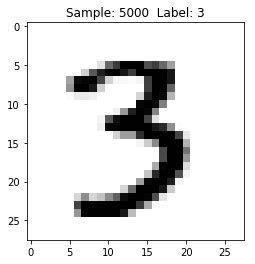

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    print(mnist.train.labels[num])  
    
    label = mnist.train.labels[num].argmax(axis=0)
    
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(5000)

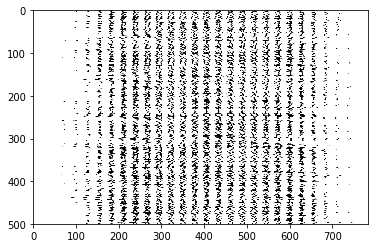

In [15]:
import numpy as np

images = mnist.train.images[0].reshape([1,784])

for i in range(1, 500):
    images = np.concatenate((images,mnist.train.images[i].reshape([1,784])))

plt.imshow(images,cmap = plt.get_cmap('gray_r'))
plt.show()
    

In [16]:
input_images = tf.placeholder(tf.float32, shape=[None,784])
target_labels = tf.placeholder(tf.float32, shape=[None,10])

In [19]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights =tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [21]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [24]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels = target_labels))

In [25]:
optimizer =tf.train.GradientDescentOptimizer(0.4).minimize(loss_function)

In [33]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1),tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [32]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 100
Accuracy: 0.8723
Training epoch 200
Accuracy: 0.8914
Training epoch 300
Accuracy: 0.9009
Training epoch 400
Accuracy: 0.9097
Training epoch 500
Accuracy: 0.9158
Training epoch 600
Accuracy: 0.9183
Training epoch 700
Accuracy: 0.9215
Training epoch 800
Accuracy: 0.9231
Training epoch 900
Accuracy: 0.9248
Training epoch 1000
Accuracy: 0.9275
Training epoch 1100
Accuracy: 0.928
Training epoch 1200
Accuracy: 0.9297
Training epoch 1300
Accuracy: 0.9292
Training epoch 1400
Accuracy: 0.9297
Training epoch 1500
Accuracy: 0.9323
Training epoch 1600
Accuracy: 0.9293
Training epoch 1700
Accuracy: 0.9315
Training epoch 1800
Accuracy: 0.9312
Training epoch 1900
Accuracy: 0.9323
Training epoch 2000
Accuracy: 0.9333


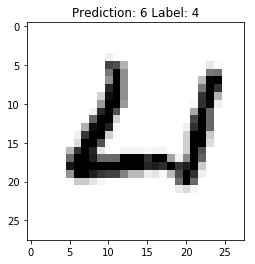

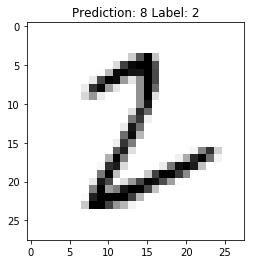

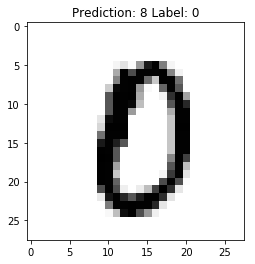

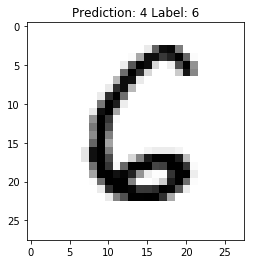

In [40]:
for x in range(100):
    
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    
    label = y_train.argmax()
    
    prediction = session.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    
    if (prediction != label) :
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()